<a href="https://colab.research.google.com/github/Tushima437/python/blob/main/Machine%20Learning%20con%20SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduccion a la clasificacion

##Entrenamiento y prueba

In [3]:
#Features 1=Si 0=No
#Tiene el pelo largo?
#Tiene las ulas afiladas?
#Hace miau?

perro1 = [0,1,1]
perro2 = [1,0,1]
perro3 = [1,1,1]

gato1 = [0,1,0]
gato2 = [0,1,1]
gato3 = [1,1,0]

datos = [perro1, perro2, perro3, gato1, gato2, gato3]
clases= [1,1,1,0,0,0]

In [6]:
##Support Vector Machine
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(datos, clases)

LinearSVC()

In [8]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [9]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

pruebas = [misterio1, misterio2, misterio3]
clase_pruebas = [0,1,1]

In [13]:
model.predict(pruebas)
#acerto 1 vez de 3 veces

array([1, 0, 1])

In [14]:
previsiones=model.predict(pruebas)

In [15]:
correctos = (previsiones==clase_pruebas).sum()
total=len(pruebas)
tasa_de_acierto = correctos/total
print(f'La tasa de acierto fue del: {round(tasa_de_acierto,2)}')

La tasa de acierto fue del: 0.33


In [16]:
correctos = (previsiones==clase_pruebas).sum()
total=len(pruebas)
tasa_de_acierto = correctos/total
print(f'La tasa de acierto fue del: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue del: 33.33%


In [18]:
from sklearn.metrics import accuracy_score
tasa_de_acierto = accuracy_score(clase_pruebas, previsiones) #valor real, valor que me dio+
print(f'La tasa de acierto fue del: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue del: 33.33%


##Estandarizacion de nombres

In [20]:
x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

In [21]:
##Support Vector Machine
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [23]:
model.predict(x_test)
#acerto 1 vez de 3 veces

array([1, 0, 1])

In [24]:
previsiones=model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
tasa_de_acierto = accuracy_score(y_test, previsiones) #valor real, valor que me dio+
print(f'La tasa de acierto fue del: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue del: 33.33%


##Ejerciocio

Francisco comenzó a estudiar aprendizaje de máquina (Machine Learning) en Alura, para en el futuro, trabajar como analista de datos. Él aprendió que, para que el aprendizaje de máquina sea eficiente, es necesario seguir un orden determinado para entrenar el modelo y después poder evaluar el desempeño de este.

¿Cuál es el orden correcto?




-Definir un modelo para test, definir una lista con datos para entrenamiento y test. Implementar una lista de 1 hasta 10 con valores aleatorios en los datos para entrenamiento. Al final será mostrado el resultado esperado


¡Alternativa incorrecta! Si utilizamos datos aleatorios de 1 hasta 10 en la etapa de entrenamiento, el modelo no tendrá un buen desempeño, pues no existe ningún patrón en los datos aleatorios. Además, debemos utilizar el modelo para entrenamiento y no para test.



-Definir un modelo de entrenamiento, definir una lista con datos aleatorios, entrenar el modelo utilizando estos datos.


¡Alternativa incorrecta! Los datos deben ser separados en entrenamiento y test, el modelo debe ser entrenado con los datos para entrenamiento y, finalmente, el desempeño es evaluado con los datos de test.




-Definir un modelo de entrenamiento, definir una lista de datos para entrenamiento y otra lista de datos para test. Entrenar el modelo con base en los datos de entrenamiento y evaluarlo con los datos de test.


¡Alternativa correcta!Definiendo el modelo para entrenamiento, debemos usar los datos de entrenamiento. Finalmente, evaluaremos los resultados con los datos de test.

#Pruebas replicables, estratificación, lectura de datos de internet.


##Lectura y manipulacion de datos

In [27]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
4,1,1,0,0
2,1,1,0,0
31,1,0,1,1
16,0,0,1,0
76,0,0,1,0


In [29]:
mapa = {
          "home":"principal",
          "how_it_works":"como_funciona",
          "contact":"contacto",
          "bought":"compro"
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
82,0,0,1,0
50,1,1,0,0
4,1,1,0,0


In [31]:
x = datos[['principal','como_funciona','contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [32]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [33]:
datos.shape
#filas #columnas

(99, 4)

In [53]:
#las primeras 75 para entrenar
#las ultimas 24 para hacer las pruebas
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [37]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

Entrenaremos con 75 elementos y probaremos con 24 elementos.


In [56]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 95.83%


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')
##Se ejecuta y siempre da un numero diferente

La tasa de acierto fue de: 100.0%


In [52]:
#debemos establecer un estado de aleatoriedad
from sklearn.model_selection import train_test_split

SEED=42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


##Estratificando Split

In [57]:
#las primeras 75 para entrenar
#las ultimas 24 para hacer las pruebas
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [58]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 95.83%


In [60]:
##CANTIDAD DE VALORES QUE USO PARA ENTRENAR EL PROYECTO
y_train.value_counts()
#48 de los que compraron, 27 de los que si

compro
0    48
1    27
Name: count, dtype: int64

In [61]:
##CANTIDAD DE VALORES QUE USO PARA prueba
y_test.value_counts()
#18 de los que compraron, 6 de los que si

compro
0    18
1     6
Name: count, dtype: int64

In [62]:
#CANTIDAD 36% COMPRARON de esos 75 (entrenamiento)
27/75

0.36

In [64]:
#CANTIDAD 36% COMPRARON de esos 75 (prueba)
6/24

0.25

In [66]:
from sklearn.model_selection import train_test_split

SEED=42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED, stratify=y)
#stratify para que haya una proporcion semejante de las clases

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


In [69]:
y_train.value_counts()

compro
0    49
1    25
Name: count, dtype: int64

In [70]:
25/74

0.33783783783783783

In [71]:
y_test.value_counts()

compro
0    17
1     8
Name: count, dtype: int64

In [72]:
8/25

0.32

##Ejercicio

María trabaja en una empresa de análisis de datos y recibió un archivo CSV para presentar los datos utilizados a los clientes. Durante los análisis, ella detecta que los nombres de las columnas están en inglés (home, services, contact y purchased), y los clientes no hablan inglés.

¿Qué debe hacer María para que los nombres de las columnas estén en español (inicio, servicios, contacto y compra)?


-Definir un diccionario para modificar las columnas, después utilizar la función rename para renombrar las columnas con las traducciones necesarias.

¡Alternativa correcta!

In [ ]:
#Si definimos un diccionario:
#mapa = {“home”: “Inicio”, “services”: “servicios”, “contact”: “contacto”, “purchased”: “compra” }
#Y utilizamos:
#datos = datos.rename(columns = mapa)
#Las columnas serán renombradas, pues la función rename espera un diccionario para poder renombrar las columnas.


-Definir una variable con los valores deseados para modificar las columnas, después utilizar la función rename para renombrar las columnas.


¡Alternativa incorrecta! La función rename espera un diccionario para poder renombrar las columnas, no una variable.

-Definir una lista con los valores deseados para modificar las columnas, después utilizar la función rename para renombrar las columnas.


¡Alternativa incorrecta! La función rename espera un diccionario para poder renombrar las columnas, no una lista.

#Modelo baseline




##Probando en dos dimesiones


In [74]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos = pd.read_csv(uri)
datos.head()

## si se finalizo o no,va a hacer tantas hora,y va a cobrar tanto

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [77]:
mapa = {
    'unfinished':'no_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'precio'
}

datos = datos.rename(columns=mapa)
datos.sample(5)

,no_finalizado,horas_esperadas,precio
26,1,74,2820
724,1,88,3563
848,1,23,193
250,1,54,900
638,0,49,326


In [79]:
cambio = {1:0, 0:1}

datos['finalizado'] = datos.no_finalizado.map(cambio)

datos.sample(3)

,no_finalizado,horas_esperadas,precio,finalizado
2114,0,77,8078,1
1117,1,7,290,0
1675,0,68,4192,1


<Axes: xlabel='horas_esperadas', ylabel='precio'>

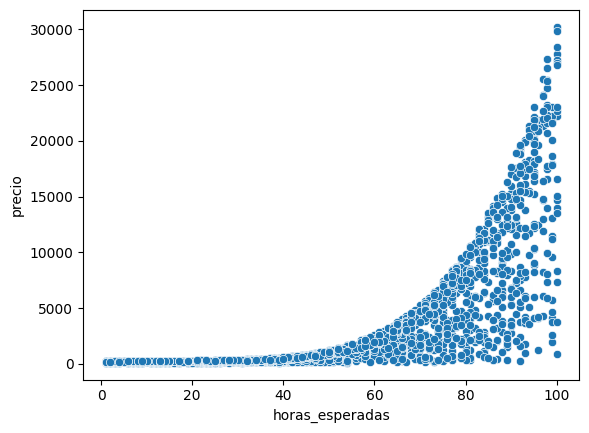

In [83]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='precio',data=datos)

<Axes: xlabel='horas_esperadas', ylabel='precio'>

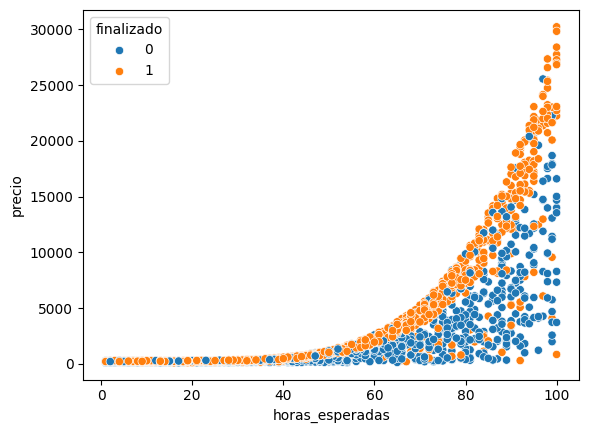

In [84]:
sns.scatterplot(x='horas_esperadas', y='precio',data=datos, hue='finalizado')

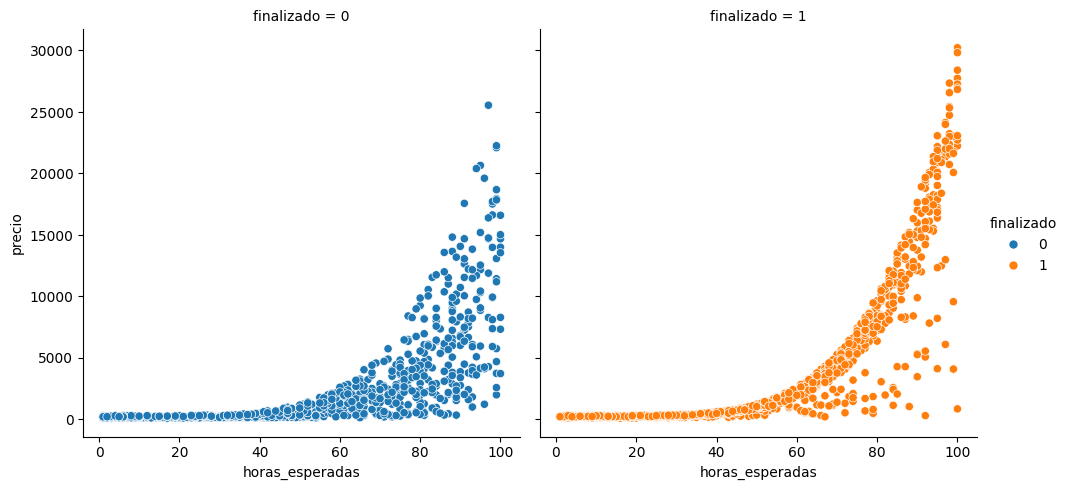

In [86]:
sns.relplot(x='horas_esperadas', y='precio',data=datos, col='finalizado', hue='finalizado')

In [87]:
###Machine learning para saber si el proyecto sera finalizado o no

In [90]:
import numpy as np

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##Curva de decision

In [92]:
#
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

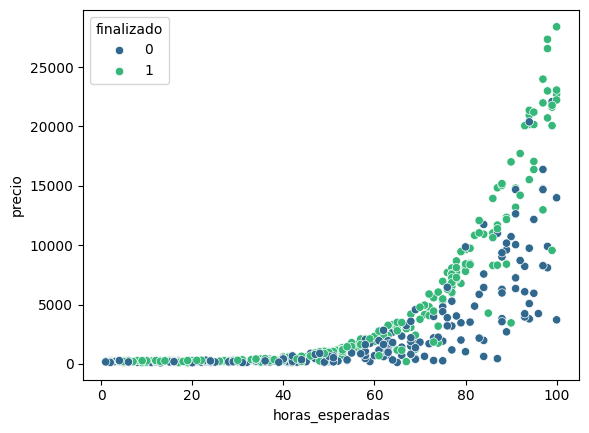

In [93]:
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test, palette='viridis')

In [95]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [96]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [98]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [99]:
Z = model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [101]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

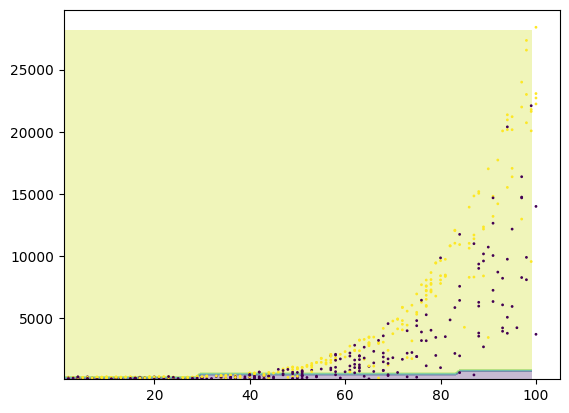

In [102]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

##Ejercicio

Un grupo de analistas de datos trabajaba en un sistema de clasificación utilizando la biblioteca SKlearn y el módulo LinearSVC para una presentación con los inversionistas. Cuando analizaron los resultados, los puntos estaban muy próximos a una línea, como puede observarse en la imagen abajo.



![IMAGEN 1](https://drive.google.com/uc?id=1bzBUiGR4FJ6LHbEdI5NtGw56Zek7sX93)



Según lo visto en esta lección ¿Qué método pueden utilizar los analistas para obtener un mejor resultado que considere una curva y no una recta?



-Utilizar el módulo “svm.SVC” para definir el gráfico.

¡Alternativa correcta! SVC nos ayudará a encontrar relaciones no lineales en nuestros datos, y cuando realicemos el gráfico veremos mejores resultados


-Utilizar el módulo LinearSVC para definir el gráfico.

¡Alternativa incorrecta! Al utilizar LinearSVC sin definir SEED, la relación linear seguirá presente a pesar de que sean utilizados diferentes números aleatorios.


-Utilizar el módulo LinearSVC con SEED como argumento para definir el gráfico.

¡Alternativa incorrecta! Utilizar SEED como argumento en LinearSVC nos ayuda a controlar la generación de números aleatorios y a obtener resultados reproducibles, pero los puntos en el gráfico continuarán próximos a la recta del eje X.

#Support Vector Machines y sistemas no lineales.

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 67.78%


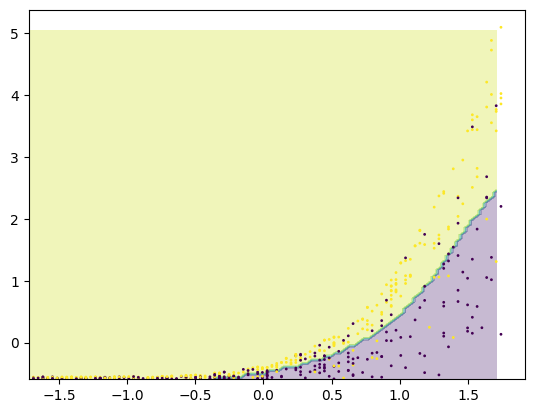

In [103]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

##Ejercicio

Un grupo de analistas de datos trabajaba en un sistema de clasificación utilizando la biblioteca SKlearn y el módulo LinearSVC para una presentación con los inversionistas. Cuando analizaron los resultados, los puntos estaban muy próximos a una línea, como puede observarse en la imagen abajo.


![IMAGEN 1](https://drive.google.com/uc?id=1bzBUiGR4FJ6LHbEdI5NtGw56Zek7sX93)


Según lo visto en esta lección ¿Qué método pueden utilizar los analistas para obtener un mejor resultado que considere una curva y no una recta?


-Utilizar el módulo “svm.SVC” para definir el gráfico.

¡Alternativa correcta! SVC nos ayudará a encontrar relaciones no lineales en nuestros datos, y cuando realicemos el gráfico veremos mejores resultados


-Utilizar el módulo LinearSVC para definir el gráfico.

¡Alternativa incorrecta! Al utilizar LinearSVC sin definir SEED, la relación linear seguirá presente a pesar de que sean utilizados diferentes números aleatorios.


-Utilizar el módulo LinearSVC con SEED como argumento para definir el gráfico.

¡Alternativa incorrecta! Utilizar SEED como argumento en LinearSVC nos ayuda a controlar la generación de números aleatorios y a obtener resultados reproducibles, pero los puntos en el gráfico continuarán próximos a la recta del eje X.

#Dummy classifiers y árboles de decisión.

##Trabajando en un nuevo proyecto

In [111]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [112]:
mapa = {
        'mileage_per_year':'millas_por_anio',
        'model_year':'anio_del_modelo',
        'price':'precio',
        'sold':'vendido'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido
8938,8938,10045,2000,21041.66,yes
9837,9837,9986,2000,100717.97,no
948,948,9984,2006,100720.95,yes


In [113]:
cambio = {'no':0, 'yes':1}

datos.vendido = datos.vendido.map(cambio)
datos.sample(3)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido
9180,9180,11870,2001,70876.24,0
7844,7844,12511,2011,99906.11,0
2985,2985,14282,2011,59081.19,1


In [116]:
from datetime import datetime

anio_actual = datetime.today().year
datos['edad_del_modelo'] = anio_actual - datos.anio_del_modelo
datos.sample(3)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido,edad_del_modelo
195,195,19236,1998,70260.51,1,26
7407,7407,13803,2002,69970.73,0,22
252,252,15216,2007,49590.78,0,17


In [118]:
datos['km_por_anio'] = datos.millas_por_anio * 1.60934
datos.head(3)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido,edad_del_modelo,km_por_anio
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806


In [120]:
datos = datos.drop(columns=['Unnamed: 0', 'millas_por_anio','anio_del_modelo'], axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_anio
5819,89173.50,0,19,11270.20802
9544,31450.46,1,16,21154.77430
7523,51247.98,1,20,39594.59202


##Dummy classifiers y SVC

In [123]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x= datos[['edad_del_modelo','km_por_anio', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 76.04%


In [124]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [125]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


##Arboles de decision yvisualizacion

In [128]:
# Usando StandardScaler()

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_anio', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [130]:
# Sin estandarizar

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_anio', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


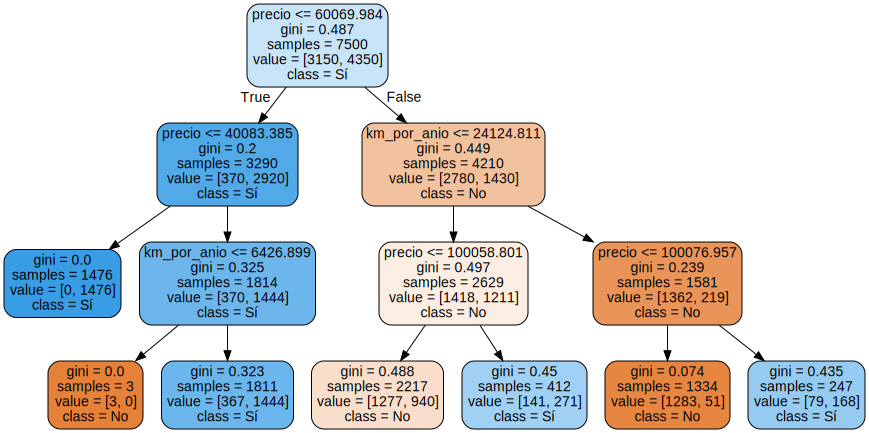

In [131]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)
grafico

##Ejercicio

Una empresa americana de carros está abriendo una filial en tu país. Esta empresa anuncia el desempeño de sus carros en millas (mi) por litro. Sin embargo, las normas en tu país exigen que los valores sean definidos en kilómetros (km) por litro. Los datos originales fueron enviados a Adriana, quién es responsable de transformarlos al formato correcto.

El archivo original contiene tres columnas: año, color y millas, ahora necesitamos una nueva columna llamada Km.

Sabiendo que Adriana utilizará la biblioteca Pandas, ¿Cuáles serán los pasos para realizar la transformación de millas a kilómetros?


In [ ]:
#datos = [‘Km’]*1.60934
#¡Alternativa incorrecta! Al utilizar datos = [‘Km’]*1.60934, tendremos un mensaje de error del tipo “SyntaxError”.

In [ ]:
#datos[‘Km’] = datos.millas*1.60934
#¡Alternativa correcta! Al utilizar datos[‘Km’] = datos.millas*1.60934, será creada una nueva columna llamada “Km” con los valores en millas transformados a kilómetros.

In [ ]:
#datos.millas = [‘Km’]*1.60934
#¡Alternativa incorrecta! Al utilizar datos.millas = [‘Km’]*1.60934, tendremos un mensaje de error del tipo “SyntaxError”.